# Convolutional Neural Network
2. We need to identify the digit in given images. We have total 70,000 images, out of which 49,000 are part of train images with the label of digit and rest 21,000 images are unlabeled (known as test images). Now, We need to identify the digit for test images. Public and Private split for test images are 40:60 and evaluation metric of this challenge is accuracy

In [1]:
#Importing all packages
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

Using TensorFlow backend.


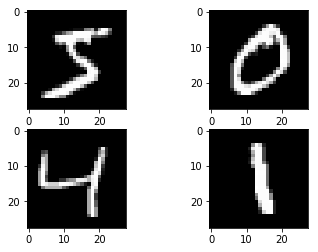

In [3]:
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# reshape to be [batch][height][width][channels]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

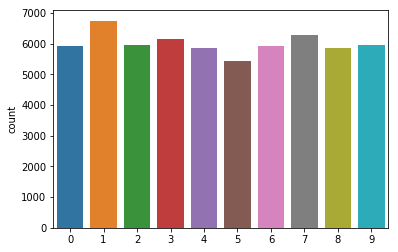

In [4]:
# free some space
# del dataset 
import seaborn as sb
g = sb.countplot(y_train)

# y_train.value_counts()

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

inally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [10]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
classifier = larger_model()
# Fit the model
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
# print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 27s 448us/sample - loss: 0.4021 - acc: 0.8754 - val_loss: 0.0858 - val_acc: 0.9730
Epoch 2/10
60000/60000 [==============================] - 24s 401us/sample - loss: 0.1003 - acc: 0.9693 - val_loss: 0.0581 - val_acc: 0.9811
Epoch 3/10
60000/60000 [==============================] - 27s 442us/sample - loss: 0.0737 - acc: 0.9776 - val_loss: 0.0425 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0623 - acc: 0.9803 - val_loss: 0.0380 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 28s 460us/sample - loss: 0.0515 - acc: 0.9839 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 6/10

In [39]:
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.95%


In [40]:
# Save the model
classifier.save('mnistCNN.h5')

In [41]:
NAME = "Handwritten-image-digit-classification-CNN"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
classifier.fit(X_train, y_train,batch_size=200, validation_data=(X_test, y_test), epochs=5, callbacks=[tensorboard])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0276 - acc: 0.9907 - val_loss: 0.0262 - val_acc: 0.9915
Epoch 2/5
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0244 - acc: 0.9917 - val_loss: 0.0223 - val_acc: 0.9928
Epoch 3/5
60000/60000 [==============================] - 25s 413us/sample - loss: 0.0233 - acc: 0.9923 - val_loss: 0.0234 - val_acc: 0.9926
Epoch 4/5
60000/60000 [==============================] - 25s 412us/sample - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0259 - val_acc: 0.9912
Epoch 5/5
60000/60000 [==============================] - 25s 417us/sample - loss: 0.0201 - acc: 0.9934 - val_loss: 0.0244 - val_acc: 0.9919


In [42]:
# Final evaluation of the model
print("Test loss & Test Accuracy: ")
# evaluate trained model
val_loss, val_acc = classifier.evaluate(X_test, y_test)
print("Validation/Test Loss: ",val_loss)
print("Validation/Test Accuracy:",(val_acc)*100)

Test loss & Test Accuracy: 
10000/10000 [==============================] - 2s 162us/sample - loss: 0.0244 - acc: 0.9919
Validation/Test Loss:  0.02439406353803206
Validation/Test Accuracy: 99.19000267982483


In [43]:
# loaded classifier model
new_model = tf.keras.models.load_model('mnistCNN.h5')

In [44]:
# predict x_test data on new_model
prediction = new_model.predict([X_test])

In [45]:
print(prediction[6])

[1.8696720e-12 1.6181684e-08 2.6246221e-07 4.0419963e-11 9.9990702e-01
 8.1423048e-07 3.2708463e-09 4.4068129e-06 8.2851169e-05 4.6012296e-06]


In [51]:
# 
print(np.argmax(prediction[0]))

7
